## CSC 84020 HW1
## Name: Subhadarshi Panda
## ID No: 23729887

In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# supress warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data
##### Wine quality data set (https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data)

#### Description


Data Set Characteristics:

    Number of Instances: 178
    Number of Attributes: 13 numeric, predictive attributes and the class
    Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		 - Alcalinity of ash  
 		- Magnesium
         - Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		 - Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2

##### load dataset

In [6]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

# load the dataset
filename = 'small.csv'  #'OnlineNewsPopularity.csv'
dataset = pd.read_csv(filename, delimiter=',')

### Create 'class' column containing days of the week

In [8]:
dataset['class'] = -1
dataset['class'][dataset[' weekday_is_monday'] == 1.0] = 0
dataset['class'][dataset[' weekday_is_tuesday'] == 1.0] = 1
dataset['class'][dataset[' weekday_is_wednesday'] == 1.0] = 2
dataset['class'][dataset[' weekday_is_thursday'] == 1.0] = 3
dataset['class'][dataset[' weekday_is_friday'] == 1.0] = 4
dataset['class'][dataset[' weekday_is_saturday'] == 1.0] = 5
dataset['class'][dataset[' weekday_is_sunday'] == 1.0] = 6


### Drop columns related to days

In [9]:
dataset.drop([' weekday_is_monday', ' weekday_is_tuesday', 
           ' weekday_is_wednesday',' weekday_is_thursday',
           ' weekday_is_friday', ' weekday_is_saturday',
           ' weekday_is_sunday', ' is_weekend'],
          axis=1, inplace=True)

### Change URL to integers

In [12]:
dataset['url'] = dataset['url'].astype('category')
dataset['url'] = dataset['url'].cat.codes

### Descriptive Statistics

##### shape of data

In [13]:
print(dataset.shape)

(499, 54)


##### first 20 rows of data

In [14]:
print(dataset.head(20))

    url   timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0     0       731.0             12.0              219.0          0.663594   
1     1       731.0              9.0              255.0          0.604743   
2     2       731.0              9.0              211.0          0.575130   
3     3       731.0              9.0              531.0          0.503788   
4     4       731.0             13.0             1072.0          0.415646   
5     5       731.0             10.0              370.0          0.559889   
6     6       731.0              8.0              960.0          0.418163   
7     7       731.0             12.0              989.0          0.433574   
8     8       731.0             11.0               97.0          0.670103   
9     9       731.0             10.0              231.0          0.636364   
10   10       731.0              9.0             1248.0          0.490050   
11   11       731.0             10.0              187.0          0.666667   

##### descriptions

In [15]:
print(dataset.describe())

              url   timedelta   n_tokens_title   n_tokens_content  \
count  499.000000  499.000000       499.000000         499.000000   
mean   249.000000  727.088176        10.028056         502.539078   
std    144.193157    2.717680         1.998798         353.134575   
min      0.000000  723.000000         5.000000          62.000000   
25%    124.500000  724.000000         9.000000         250.000000   
50%    249.000000  728.000000        10.000000         358.000000   
75%    373.500000  729.000000        11.000000         704.000000   
max    498.000000  731.000000        16.000000        1821.000000   

        n_unique_tokens   n_non_stop_words   n_non_stop_unique_tokens  \
count        499.000000       4.990000e+02                 499.000000   
mean           0.558943       1.000000e+00                   0.703660   
std            0.101576       3.775748e-09                   0.099747   
min            0.359905       1.000000e+00                   0.438429   
25%          

##### class distribution

In [16]:
print(dataset.groupby('class').size())

class
0    157
1     78
2     89
3     80
4     51
5     20
6     24
dtype: int64


##### data type of features

In [17]:
print(dataset.dtypes)

url                                 int16
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

##### data correlation

In [18]:
print(dataset.corr(method='pearson'))

                                     url   timedelta   n_tokens_title  \
url                             1.000000   -0.982933         0.022880   
 timedelta                     -0.982933    1.000000        -0.029660   
 n_tokens_title                 0.022880   -0.029660         1.000000   
 n_tokens_content              -0.073790    0.067489        -0.059923   
 n_unique_tokens                0.029554   -0.022015         0.059701   
 n_non_stop_words               0.013138   -0.021455        -0.075068   
 n_non_stop_unique_tokens       0.055728   -0.053698         0.085233   
 num_hrefs                     -0.061443    0.057710        -0.107754   
 num_self_hrefs                -0.184959    0.192743        -0.061725   
 num_imgs                      -0.182035    0.185316        -0.039284   
 num_videos                     0.040157   -0.032464        -0.023963   
 average_token_length          -0.022275    0.016689        -0.158358   
 num_keywords                  -0.122376    0.14706

##### data skew

In [19]:
print(dataset.skew())

url                               0.000000
 timedelta                       -0.134926
 n_tokens_title                   0.038508
 n_tokens_content                 1.101196
 n_unique_tokens                  0.234158
 n_non_stop_words                 0.000000
 n_non_stop_unique_tokens        -0.050713
 num_hrefs                        2.165581
 num_self_hrefs                   2.220030
 num_imgs                         1.792749
 num_videos                       5.248971
 average_token_length             0.446170
 num_keywords                    -0.089837
 data_channel_is_lifestyle        2.432880
 data_channel_is_entertainment    1.963001
 data_channel_is_bus              2.077903
 data_channel_is_socmed           3.953809
 data_channel_is_tech             1.047663
 data_channel_is_world            2.203603
 kw_min_min                      -1.877694
 kw_max_min                       4.291692
 kw_avg_min                       3.200447
 kw_min_max                       8.173857
 kw_max_max

### Visualization

##### box plot for all features

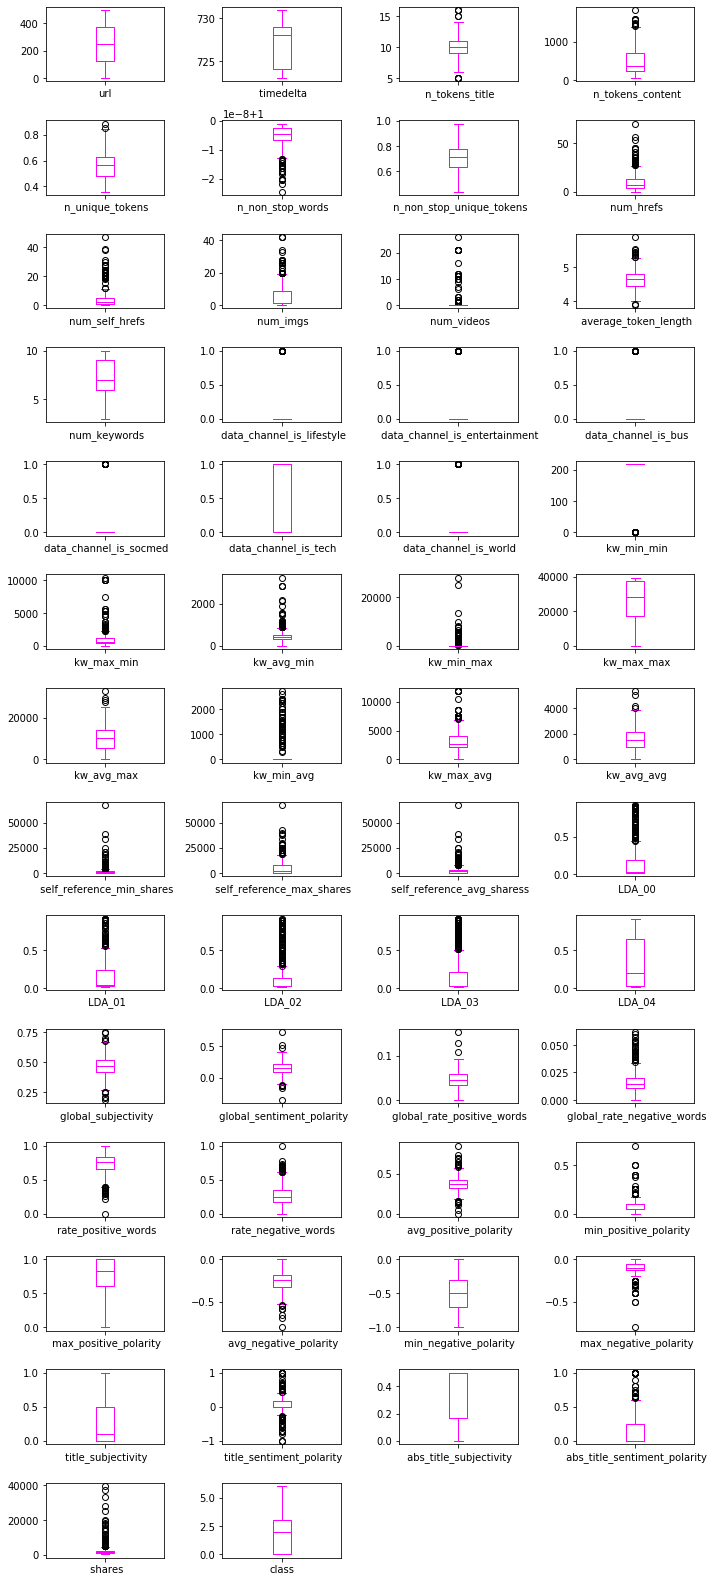

In [28]:
pylab.rcParams['figure.figsize'] = (10, 25)
dataset.plot(kind='box', subplots=True, layout=(16, 4), sharex=False, sharey=False, color='magenta')
plt.tight_layout()
plt.show()

##### histograms for all features

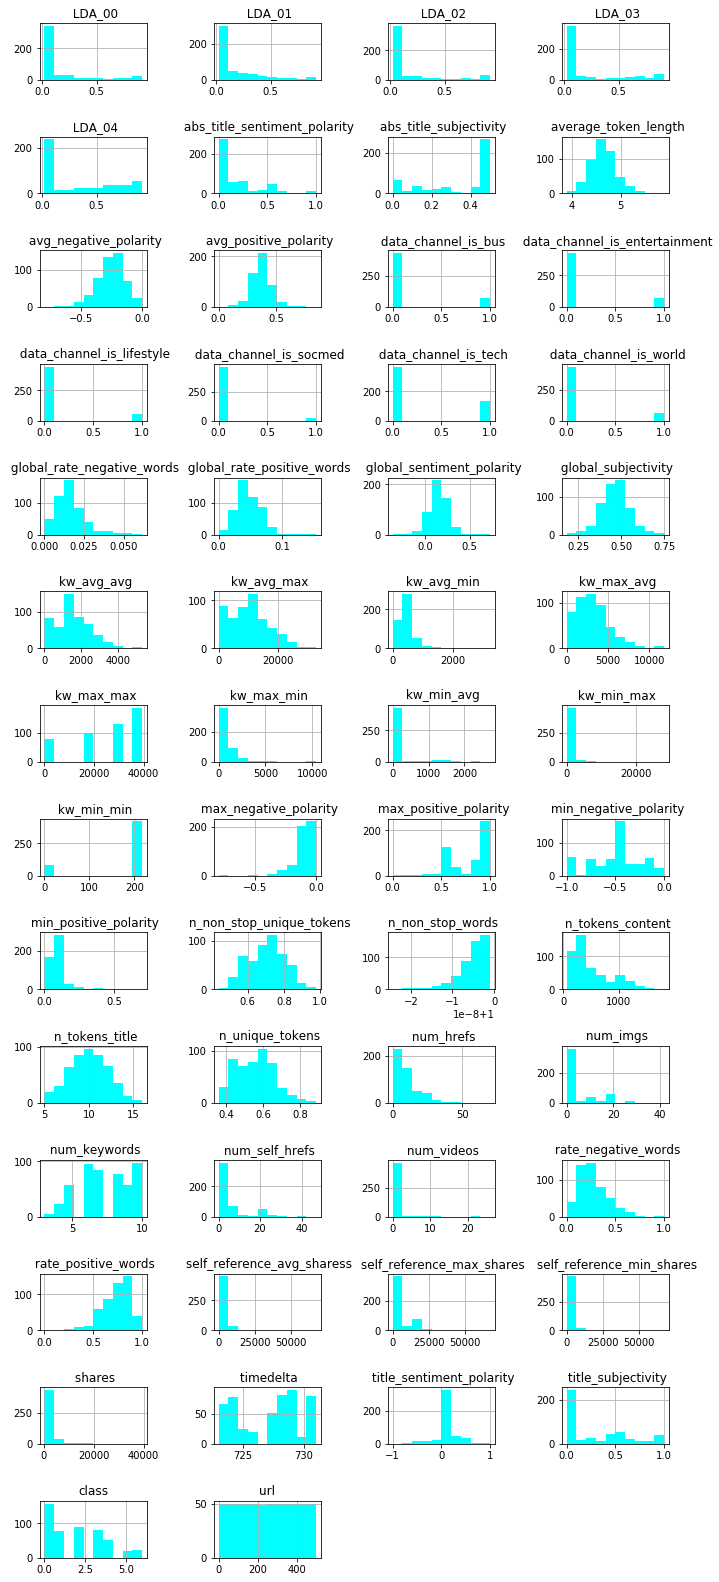

In [31]:
dataset.hist(color='cyan', layout=(16, 4))
plt.tight_layout()
plt.show()

##### scatter matrix

In [32]:
dataset.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity'

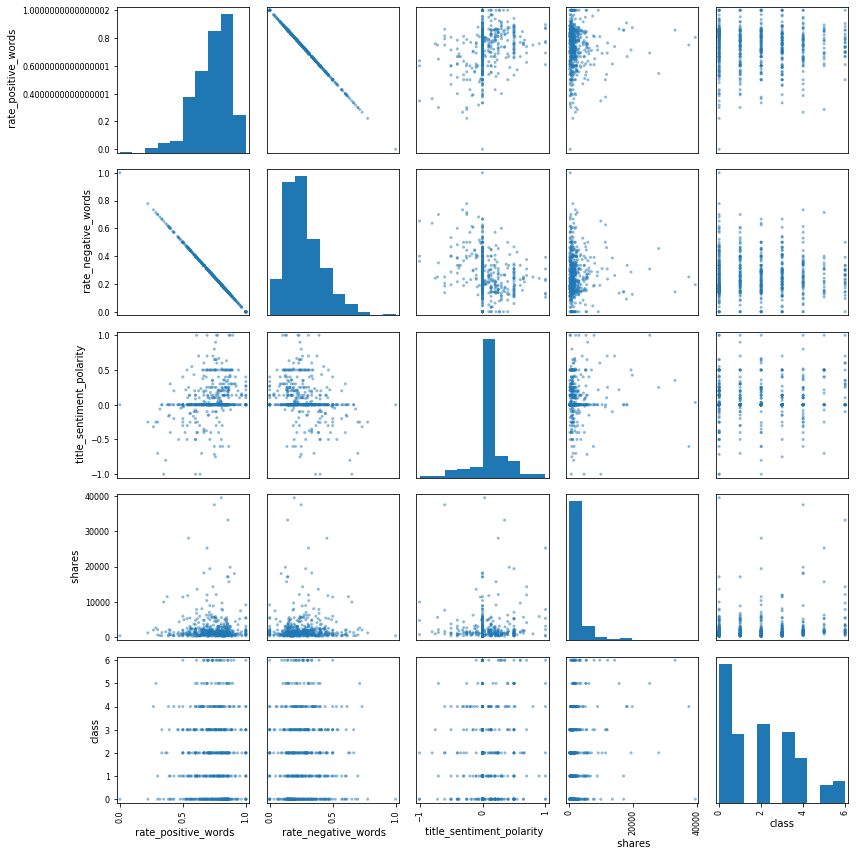

In [37]:
# We choose only four features and the class for visualization purpose
# (The  features chosen are ' rate_positive_words', ' rate_negative_words', ' title_sentiment_polarity', ' shares')
pylab.rcParams['figure.figsize'] = (12, 12)

scatter_matrix(dataset[[' rate_positive_words', ' rate_negative_words', ' title_sentiment_polarity', ' shares', 'class']])
plt.tight_layout()
plt.show()

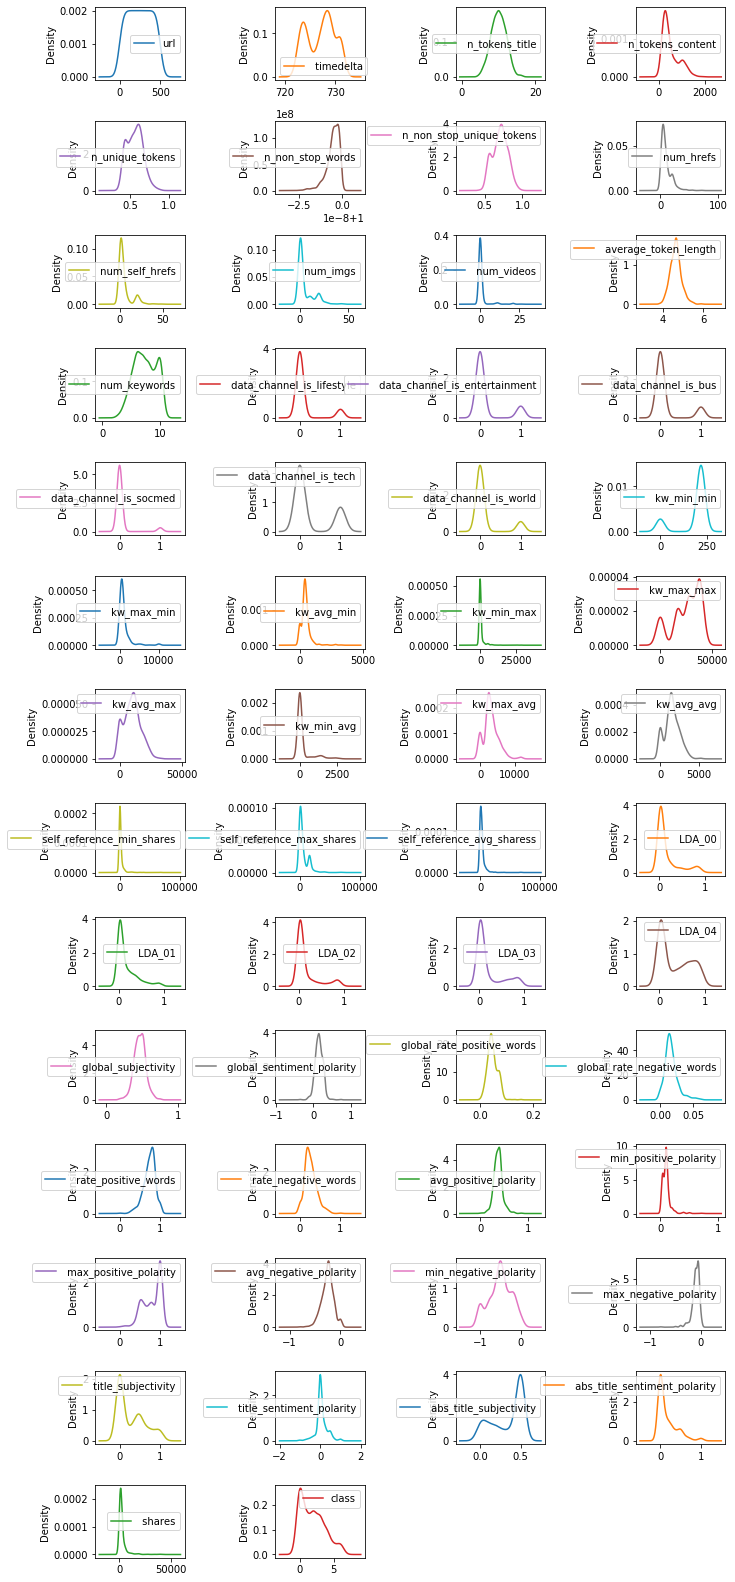

In [39]:
pylab.rcParams['figure.figsize'] = (10, 25)
dataset.plot(kind='density', subplots=True, layout=(16,4), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

##### correlation matrix plot

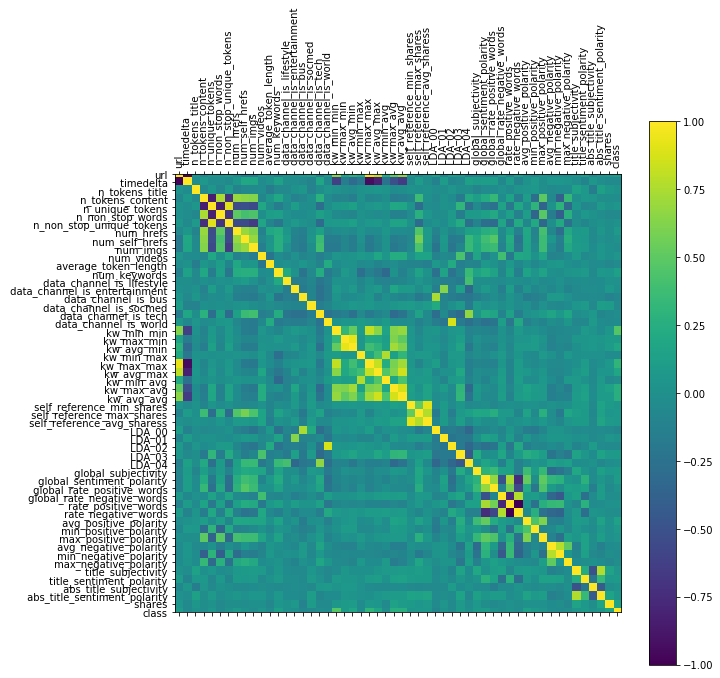

In [45]:
pylab.rcParams['figure.figsize'] = (10, 10)
correlations = dataset.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns, rotation=90)
ax.set_yticklabels(dataset.columns)
plt.show()
correlations = dataset.corr()

### Classification

##### prepare data

In [46]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:-1]
Y = array[:,-1]
validation_size = 0.20
seed = 122
X_train, X_validation, Y_train, Y_validation = \
train_test_split(X, Y, test_size=validation_size, random_state=seed)


##### spot-check algorithms

In [47]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.764103 (0.078985)
LDA: 0.633846 (0.095437)
KNN: 0.683846 (0.090684)
CART: 0.997500 (0.007500)
NB: 0.774295 (0.041231)
SVM: 0.308269 (0.035356)


##### compare algorithms

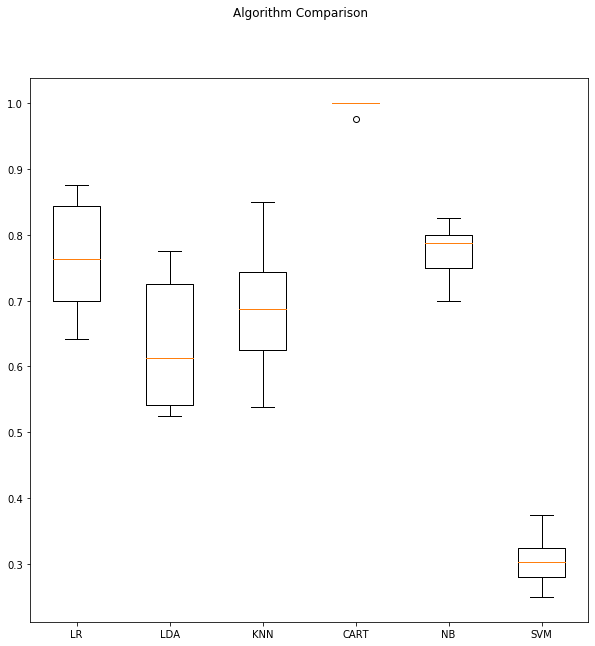

In [48]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### clearly, the best performing model is CART
##### make predictions on validation dataset using CART model

In [49]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print('accuracy:', accuracy_score(Y_validation, predictions))
print('confusion matrix:\n', confusion_matrix(Y_validation, predictions))
print('classification report:\n', classification_report(Y_validation, predictions))

accuracy: 0.99
confusion matrix:
 [[34  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0  8  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  1]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        19
         4.0       1.00      1.00      1.00         8
         5.0       0.83      1.00      0.91         5
         6.0       1.00      0.50      0.67         2

    accuracy                           0.99       100
   macro avg       0.98      0.93      0.94       100
weighted avg       0.99      0.99      0.99       100

